In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
#Import the MNIST Dataset

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

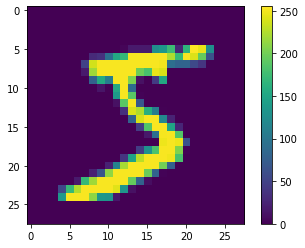

Label:  5


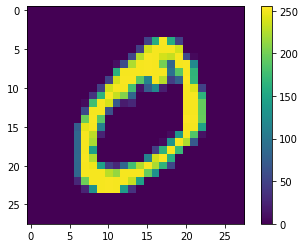

Label:  0


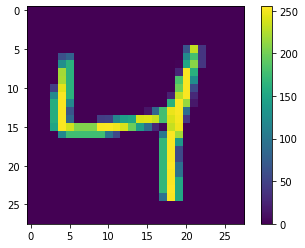

Label:  4


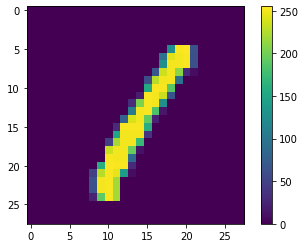

Label:  1


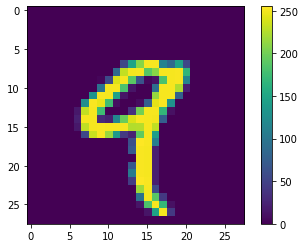

Label:  9


In [7]:
#Display the first 5 images and corresponding labels in the dataset

for i in range(5):
  plt.figure()
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print('Label: ', train_labels[i])

#Reshape Train and Test images to be (num_images, width, height, depth)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

#Normalize the image data 
train_images = train_images / 255.
test_images  = test_images / 255.



In [8]:
#Train a shallow Convolutional Neural Network 

conv_model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.Flatten(input_shape = (24, 24)),
                             tf.keras.layers.Dense(10, activation = 'softmax')
                             ])

conv_model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = conv_model.fit(train_images, train_labels, epochs=25, verbose = 1)

Epoch 1/25
1875/1875 [==============================] - 12s 2ms/step - loss: 0.2655 - accuracy: 0.9174
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0478 - accuracy: 0.9857
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.00

313/313 [==============================] - 1s 2ms/step - loss: 0.1282 - accuracy: 0.9857


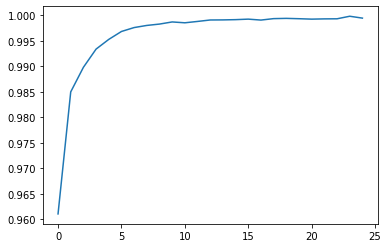

In [9]:
#Plot the accuracy of the model

test_loss, test_accuracy = model_conv.evaluate(test_images, test_labels)
plt.plot(history.history['accuracy'])
plt.plot(test_accuracy)
plt.show()


In [10]:
#OPTIONAL: Train a shallow Linear Neural Network on the dataset

linear_model = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                  tf.keras.layers.Dense(512, activation='relu'),
                  tf.keras.layers.Dense(10, activation = 'softmax')
])

linear_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

linear_model.fit(train_images, train_labels, epochs=25, verbose = 1)

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.9011
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0837 - accuracy: 0.9747
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9854
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9894
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0217 - accuracy: 0.9935
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0108 - accuracy: 0.9969
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.009

In [11]:
#Evaluate the linear model

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1214 - accuracy: 0.9805
